# Inferential statistics
## Part II - Exploratory Data Analysis

Before starting the actual analysis it's a good idea to explore the data that we will be using, to give yourself a first idea of the questions you will be able to answer with your data, the bias you could have, other data you could need, etc.

### Libraries
In addition to pandas we will also import matplolib and seaborn so that we will able to plot our data to better understand it.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', 100)
%matplotlib inline

### Explore the dataset

Let's load the cleaned dataset first. Import it with the name `wnba` and show the head.

In [6]:
MIN = wnba.loc[wnba['Team'] == 'MIN']

NameError: name 'wnba' is not defined

In [ ]:
#Story: does teams with star players are better or the team effort is more important
#Team effort: Minutes player - scored evenly
wnba.head(10)

In [ ]:
star_player = wnba.loc[(wnba['REB'] > 300) | (wnba['AST'] > 180) |(wnba['STL'] >
                       50) |(wnba['PTS'] > 500) |(wnba['BLK'] > 60)]
star_player

In [ ]:
Teams_sp = star_player['Team'].unique()
print(Teams_sp)

In [ ]:
Teams_sp = wnba.groupby(['Team']).mean()
Teams_sp

In [ ]:
star_player = wnba.loc[(wnba['REB'] > 300) | (wnba['AST'] > 180) |(wnba['STL'] >
                       50) |(wnba['PTS'] > 500) |(wnba['BLK'] > 60)]
Teams_sp = star_player['Team'].unique()

Teams_sp = wnba.groupby(['Team']).mean()

Teams_sp = Teams_sp.loc[['LA', 'SEA', 'IND', 'WAS', 'MIN', 'CHI', 'ATL', 'DAL', 'NY']]

Teams_sp

In [ ]:
lst = ['REB', 'AST','STL', 'PTS', 'BLK' ]

ig, ax = plt.subplots(1,5, figsize=(15,3))

for i,el in enumerate(lst):
    sns.histplot(wnba.loc[:, el], ax = ax[i])
    
plt.show()    

In [ ]:
#your code here

wnba = pd.read_csv('../data/wnba_clean.csv')

In [ ]:
sns.heatmap(wnba.corr())

**Use describe() to take an initial look at the data.**

In [4]:
#your code here
wnba.describe().transpose()

NameError: name 'wnba' is not defined

Most of the game-related stats have a very high range of values which can be explained by the fact that the dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

There are also some extremes in the weight and age columns. Feel free, if you'd like, to check which are the players with a very high (or low) age/weight and do some research on them. This is useful to confirm that they are simply outliers and not errors in the data.

In [ ]:
wnba['Weight'].max()

In [ ]:
#your code here

wnba.loc[wnba['Weight']==113]

In [ ]:
wnba['Height'].max()

In [ ]:
wnba.loc[wnba['Height'] == 206]

### Looking at the distributions of the data
Let's take a look at the distribution of the 4 stats that describe the physical characteristics of the players.

**Plot the four distributions about `height`, `weight`, `age` and `BMI`.**

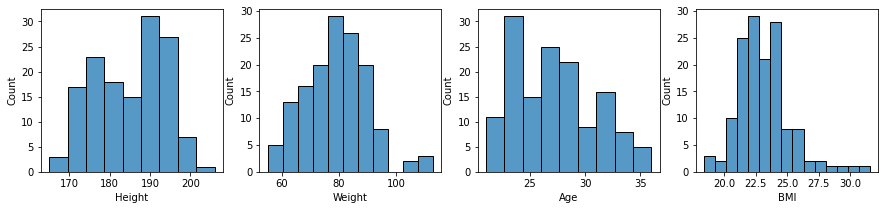

In [20]:

lst = ['Height', 'Weight', 'Age', 'BMI']

fig, ax = plt.subplots(1,4, figsize=(15,3))

for i,el in enumerate(lst):
    sns.histplot(wnba.loc[:, el], ax = ax[i])
    
plt.show()


In [ ]:
#your code here

plt.hist(wnba['Height'])

In [ ]:
plt.hist(wnba['Weight'])

In [ ]:
plt.hist(wnba['Age'])

In [ ]:
plt.hist(wnba['BMI'])

**What conclusions do you think we can take from this plots?**

In [ ]:
#your conclusions here
#BMI and Age are skewed to the right, meaning that player are mostly young and with a BMI lover than 26

In addition to what the describe() method already told us we can see that the physical characteristics of the players (apart from the age) more or less follow a standard distribution, which is expected when looking at the distribution of values that arise from a lot of factors that are independent from each other as is the case for many physical quantities. 

The height distribution looks like a bimodal. This may be due to the fact that players in basketball fall under two main categories (please note that this is a very gross generalization): shorter and more agile, and taller and less agile. Therefore there are less "average" height players since they will neither be as agile as the shorter players nor have the same impact in the paint (that is, under the basket) as a taller player.

The age distribution is a bit skewed to the right which is expected since most professional players stop playing after their prime physical years come to an end.

We could do the same for the main game stats. They are points, assists, blocks, rebounds and steals. 

**Now plot the distribution of the columns `REB`, `AST`, `STL`, `PTS` and `BLK` the same way you did in the last cell.**

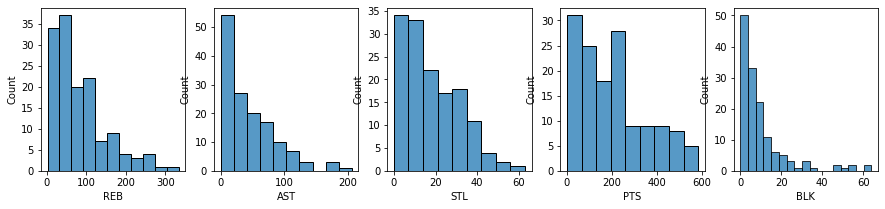

In [19]:
#your code here

lst = ['REB', 'AST','STL', 'PTS', 'BLK' ]

ig, ax = plt.subplots(1,5, figsize=(15,3))

for i,el in enumerate(lst):
    sns.histplot(wnba.loc[:, el], ax = ax[i])
    
plt.show()    

**What conclusions do you think we can take from this plots?**

In [ ]:
#your conclusions here
All graph are skewed to the right

As expected all of the above distribution are heavily skewed to the right, since most players will have very low to average stats while there will be a handful of star players whose stats peak above everyone else. It is also important to think about the fact that we are simply taking the stats as they are without considering the minutes played by each player. Even though skill plays a very important factor in determining this kind of stats we also have to consider that players that play more minutes will, on average, score more points (or blocks, assists, etc.).

**For the sake of it let's look at the same distributions by dividing those stats by the minutes played for each player in the dataset.** 

In [6]:
#your code here

wnba['REB_div'] = wnba['REB']/wnba['MIN']
wnba['AST_div'] = wnba['AST']/wnba['MIN']
wnba['STL_div'] = wnba['STL']/wnba['MIN']
wnba['PTS_div'] = wnba['PTS']/wnba['MIN']
wnba['BLK_div'] = wnba['BLK']/wnba['MIN']

lst = ['REB_div', 'AST_div','STL_div', 'PTS_div', 'BLK_div' ]

ig, ax = plt.subplots(1,5, figsize=(15,3))

for i,el in enumerate(lst):
    sns.histplot(wnba.loc[:, el], ax = ax[i])
    
plt.show()    

NameError: name 'wnba' is not defined

**What conclusions do you think we can take from this plots?**

In [7]:
#your conclusions here

### Summary

The main insights we obtained from this exploratory analysis are:
- Game-related stats have a very high range of values.
- There are some extremes in the weight and age columns.
- The physical characteristics of the players more or less follow a standard distribution.
- We need to take into account that our dataset contains data on both players that play the majority of games and also players that may spend almost the entirety of the season on the bench.

Now, it's time to try to put an end to your family's discussions. As seen on the README, the main discussions are:
- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

**Do you think you have all the necessary data to answer these questions?**

In [8]:
#your comments here
sns.pairplot(wnba[['REB', 'AST','STL', 'PTS', 'BLK']])


NameError: name 'wnba' is not defined

In [9]:
sns.pairplot(wnba[['BMI', 'FG%']])

NameError: name 'wnba' is not defined

In [10]:
plt.figure(figsize=(20, 20))
sns.heatmap(wnba.corr(), annot=True)

NameError: name 'wnba' is not defined

<Figure size 1440x1440 with 0 Axes>